In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
u0 = np.load("u0.npy")
u1 = np.load("u1.npy")
print(f"{u0.shape=}")
print(f"{u1.shape=}")

u0.shape=(15000, 256)
u1.shape=(15000, 256)


Split data

In [3]:
train_size = 9000
val_size = 3000
test_size = 3000

if train_size + val_size + test_size != len(u0):
    print("Train, val and test sizes do not match the total size of the data.")

u0_train, u1_train = u0[:train_size], u1[:train_size]
u0_val, u1_val = u0[train_size:train_size+val_size], u1[train_size:train_size+val_size]
u0_test, u1_test = u0[-test_size:], u1[-test_size:]

In [4]:
np.save("train.npy", (u0_train, u1_train))
np.save("val.npy", (u0_val, u1_val))
np.save("test.npy", (u0_test, u1_test))
np.save("full_data.npy", (u0, u1))

Load data


In [5]:
train_u0, train_u1 = np.load("train.npy")
val_u0, val_u1 = np.load("val.npy")
test_u0, test_u1 = np.load("test.npy")

print(f"{train_u0.shape=}, {train_u1.shape=}")
print(f"{val_u0.shape=}, {val_u1.shape=}")
print(f"{test_u0.shape=}, {test_u1.shape=}")

train_u0.shape=(9000, 256), train_u1.shape=(9000, 256)
val_u0.shape=(3000, 256), val_u1.shape=(3000, 256)
test_u0.shape=(3000, 256), test_u1.shape=(3000, 256)


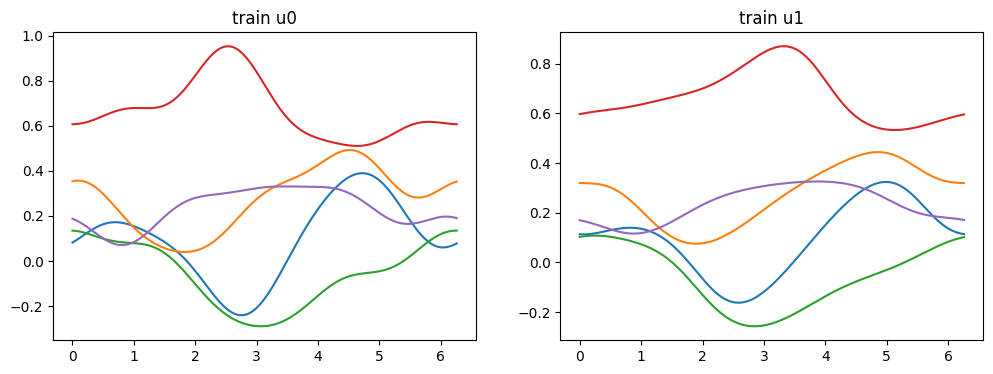

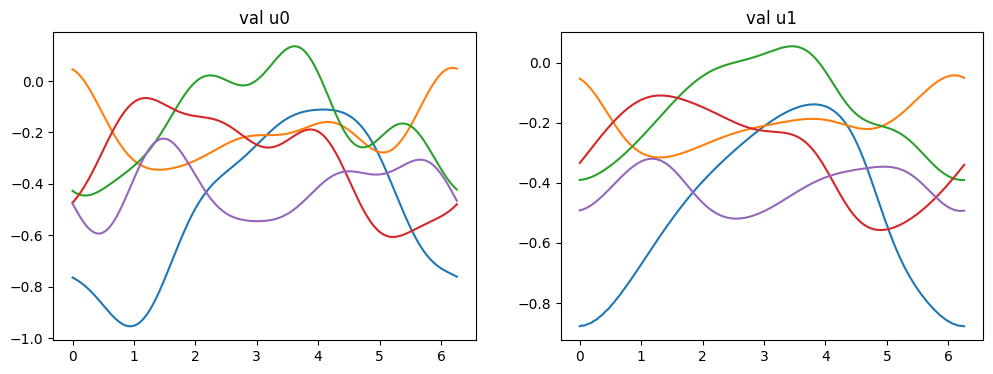

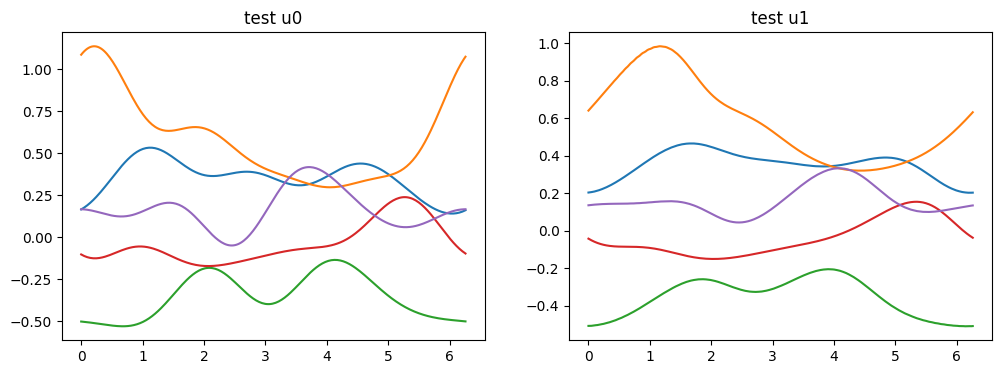

In [6]:
def plot_pair(data_pair, x_bounds, space_resolution, n_to_plot=5, prefix=""):
    x_space = np.linspace(x_bounds[0], x_bounds[1], space_resolution+1)[:-1]
    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    u0, u1 = data_pair
    ax[0].plot(x_space, u0.T[:, :n_to_plot])
    ax[0].set_title(f"{prefix}u0")
    ax[1].plot(x_space, u1.T[:, :n_to_plot])
    ax[1].set_title(f"{prefix}u1");
    plt.show()

x_bounds = (0,2*np.pi)
space_resolution = train_u0.shape[1]

plot_pair((train_u0, train_u1), x_bounds, space_resolution, prefix="train ")
plot_pair((val_u0, val_u1), x_bounds, space_resolution, prefix="val ")
plot_pair((test_u0, test_u1), x_bounds, space_resolution, prefix="test ")